In [11]:
import math
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
pd.options.display.float_format = '{:.5f}'.format

In [12]:
nyc_crime = pd.read_csv('nyc_crime_2013.csv')
nyc_crime[['Population']] = nyc_crime['Population'].str.replace(',','')
nyc_crime[['Violent_Crime']] = nyc_crime['Violent_Crime'].str.replace(',','')
nyc_crime[['Rape(Legal)']] = nyc_crime['Rape(Legal)'].str.replace(',','')
nyc_crime[['Property_Crime']] = nyc_crime['Property_Crime'].str.replace(',','')
nyc_crime[['Vehicle Theft']] = nyc_crime['Vehicle Theft'].str.replace(',','')
nyc_crime[['Larceny']] = nyc_crime['Larceny'].str.replace(',','')
nyc_crime[['Burglary']] = nyc_crime['Burglary'].str.replace(',','')
nyc_crime[['Robbery']] = nyc_crime['Robbery'].str.replace(',','')
nyc_crime[['Agg Assault']] = nyc_crime['Agg Assault'].str.replace(',','')
nyc_crime[
    ['Population', 'Violent_Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property_Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ] = nyc_crime[
    ['Population', 'Violent_Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property_Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ].astype(float)
nyc_crime['robbery_bool'] = np.where(nyc_crime['Robbery'] > 0, 1, 0)
nyc_crime['arson_bool'] = np.where(nyc_crime['Arson'] > 0, 1, 0)
#nyc_crime['murder_bool'] = np.where(nyc_crime['Murder'] > 0, 1, 0)
nyc_crime['larceny_bool'] = np.where(nyc_crime['Larceny'] > 0, 1, 0)
nyc_crime['violent_bool'] = np.where(nyc_crime['Violent_Crime'] > 0, 1, 0)
nyc_crime['burglary_bool'] = np.where(nyc_crime['Burglary'] > 0, 1, 0)
#nyc_crime['larceny_rate'] = nyc_crime['Larceny'] / nyc_crime['Population']
nyc_crime['propertycrime_rate'] = nyc_crime['Property_Crime'] / nyc_crime['Population']
nyc_crime['pop_squared'] = nyc_crime['Population'] * nyc_crime['Population']
nyc_crime['propcrimesqrt'] = [math.sqrt(x) for x in nyc_crime['Property_Crime']]
#to_drop = ['New York']
#nyc_crime = nyc_crime[~nyc_crime['City'].isin(to_drop)]
nyc_crime = nyc_crime[nyc_crime['Population'] < 18000.5]
#nyc_crime = nyc_crime.fillna(0)
#nyc_crime = nyc_crime.replace(0, '')
nyc_crime.head()

,City,Population,Violent_Crime,Murder,Rape (Rev),Rape(Legal),Robbery,Agg Assault,Property_Crime,Burglary,...,Vehicle Theft,Arson,robbery_bool,arson_bool,larceny_bool,violent_bool,burglary_bool,propertycrime_rate,pop_squared,propcrimesqrt
0,Adams Village,1861.00000,0.00000,0.00000,nan,0.00000,0.00000,0.00000,12.00000,2.00000,...,0.00000,0.00000,0,0,1,0,1,0.00645,3463321.00000,3.46410
1,Addison Town and Village,2577.00000,3.00000,0.00000,nan,0.00000,0.00000,3.00000,24.00000,3.00000,...,1.00000,0.00000,0,0,1,1,1,0.00931,6640929.00000,4.89898
2,Akron Village,2846.00000,3.00000,0.00000,nan,0.00000,0.00000,3.00000,16.00000,1.00000,...,0.00000,0.00000,0,0,1,1,1,0.00562,8099716.00000,4.00000
4,Albion Village,6388.00000,23.00000,0.00000,nan,3.00000,4.00000,16.00000,223.00000,53.00000,...,5.00000,nan,1,0,1,1,1,0.03491,40806544.00000,14.93318
5,Alfred Village,4089.00000,5.00000,0.00000,nan,0.00000,3.00000,2.00000,46.00000,10.00000,...,0.00000,nan,1,0,1,1,1,0.01125,16719921.00000,6.78233


In [13]:
regr = linear_model.LinearRegression()
# Mentor Q, why the reshape?
Y = nyc_crime['propcrimesqrt'].values.reshape(-1, 1)
X = nyc_crime[['Population', 'Burglary', 'larceny_bool']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[3.46029922e-04 1.60640427e-01 4.64385863e+00]]

Intercept: 
 [-0.32800251]

R-squared:
0.782838467201744


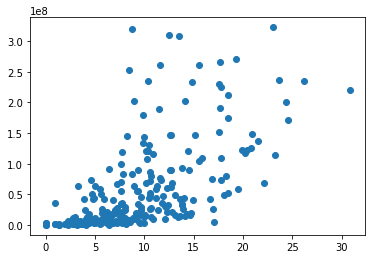

In [14]:
#blank = nyc_crime['Burglary']
transform = [math.pow(x, 2) for x in nyc_crime['Population']]
inverse = 1/nyc_crime['Population']

#plt.scatter(Y, blank)
plt.scatter(Y, transform)
plt.show()

In [15]:
predicted = regr.predict(X).ravel()
actual = nyc_crime['propcrimesqrt']
residual = actual - predicted

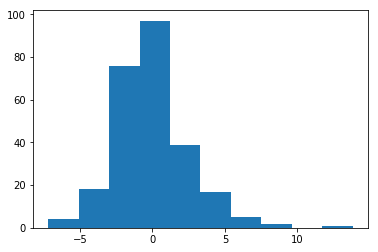

In [16]:
plt.hist(residual)
plt.show()

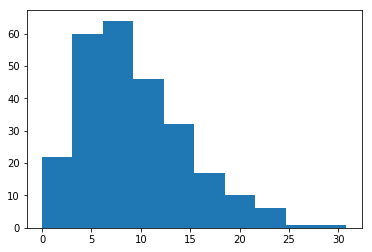

In [17]:
transform = [math.sqrt(x) for x in nyc_crime['Property_Crime']]

plt.hist(transform)
plt.show()

Text(0,0.5,'Residual')

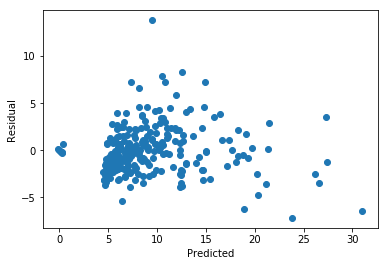

In [18]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [19]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Population,Burglary,larceny_bool
Population,1.00000,0.60930,0.17939
Burglary,0.60930,1.00000,0.13628
larceny_bool,0.17939,0.13628,1.00000


In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score()

TypeError: cross_val_score() missing 2 required positional arguments: 'estimator' and 'X'

In [21]:
linear_formula = 'propcrimesqrt ~ Population+Burglary+larceny_bool'
lm = smf.ols(formula=linear_formula, data=nyc_crime).fit()

In [22]:
lm.params

Intercept      -0.32800
Population      0.00035
Burglary        0.16064
larceny_bool    4.64386
dtype: float64

In [23]:
lm.pvalues

Intercept      0.73891
Population     0.00000
Burglary       0.00000
larceny_bool   0.00001
dtype: float64

In [24]:
lm.rsquared

0.782838467201744

In [25]:
lm.conf_int()

,0,1
Intercept,-2.26392,1.60791
Population,0.00025,0.00044
Burglary,0.14295,0.17833
larceny_bool,2.65143,6.63628


In [26]:
nyc_crime2 = pd.read_csv('nyc_crime_2014.csv')
nyc_crime2['Property_Crime'] = nyc_crime2['Property_Crime'].astype(float)
nyc_crime2['propcrimesqrt'] = [math.sqrt(x) for x in nyc_crime2['Property_Crime']]
nyc_crime2['larceny_bool'] = np.where(nyc_crime2['Larceny'] > 0, 1, 0)

In [27]:
nyc_crime2.head()

,City,Population,Violent_Crime,Murder,Rape (Rev),Rape(Legal),Robbery,Agg Assault,Property_Crime,Burglary,Larceny,Vehicle Theft,Arson,propcrimesqrt,larceny_bool
0,Adams Village,1851,0,0,nan,0.00000,0,0,11.00000,1,10.00000,0,0.00000,3.31662,1
1,Addison Town and Village,2568,2,0,nan,0.00000,1,1,49.00000,1,47.00000,1,0.00000,7.00000,1
2,Afton Village,820,0,0,0.00000,nan,0,0,1.00000,0,1.00000,0,0.00000,1.00000,1
3,Akron Village,2842,1,0,nan,0.00000,0,1,17.00000,0,17.00000,0,0.00000,4.12311,1
4,Albany,98595,802,8,54.00000,nan,237,503,3888.00000,683,3083.00000,122,12.00000,62.35383,1


In [28]:
lm2 = smf.ols(formula=linear_formula, data=nyc_crime2).fit()

In [29]:
lm2.params

Intercept       0.48344
Population     -0.00004
Burglary        0.04568
larceny_bool   10.55644
dtype: float64

In [30]:
lm2.pvalues

Intercept      0.85334
Population     0.00000
Burglary       0.00000
larceny_bool   0.00008
dtype: float64

In [31]:
lm2.rsquared

0.8674140723204764

In [32]:
lm2.conf_int()

,0,1
Intercept,-4.65577,5.62264
Population,-0.00005,-0.00003
Burglary,0.04108,0.05028
larceny_bool,5.34330,15.76957
